# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from L2.sga import SGA
from L2.mutation import reverse_sequence_mutation, transposition_mutation
from L2.replacement import mu_plus_lambda_replacement
from L2.genetic_operator import pmx

%matplotlib inline

## Input data

In [2]:
# bayg29

n = 29
print('Problem size: %d' % n)

coords = np.array([[ 1150.,  1760.],
       [  630.,  1660.],
       [   40.,  2090.],
       [  750.,  1100.],
       [  750.,  2030.],
       [ 1030.,  2070.],
       [ 1650.,   650.],
       [ 1490.,  1630.],
       [  790.,  2260.],
       [  710.,  1310.],
       [  840.,   550.],
       [ 1170.,  2300.],
       [  970.,  1340.],
       [  510.,   700.],
       [  750.,   900.],
       [ 1280.,  1200.],
       [  230.,   590.],
       [  460.,   860.],
       [ 1040.,   950.],
       [  590.,  1390.],
       [  830.,  1770.],
       [  490.,   500.],
       [ 1840.,  1240.],
       [ 1260.,  1500.],
       [ 1280.,   790.],
       [  490.,  2130.],
       [ 1460.,  1420.],
       [ 1260.,  1910.],
       [  360.,  1980.]])

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

# p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
# print('Optimal solution:\n', p)

Problem size: 29
Distance matrix:
 [[    0.           529.52809179  1158.01554394   771.75125526
    482.59714048   332.41540277  1217.41529479   364.00549446
    616.11687203   629.3647591   1249.07966119   540.37024344
    456.94638635  1238.22453537   948.47245611   574.89129407
   1488.38839017  1134.06349029   817.43501271   671.19296778
    320.15621187  1422.39235094   864.00231481   282.31188427
    978.67257037   756.63729752   460.10868281   186.01075238
    820.06097334]
 [  529.52809179     0.           730.06848994   572.71284253
    388.97300678   572.80013966  1435.44418213   860.52309673
    620.96698785   359.02646142  1129.69022303   837.37685662   466.9047012
    967.4709298    769.41536247   796.30396206  1142.32219623
    817.86306922   819.87803971   272.94688128   228.25424421
   1168.41773352  1280.82004981   650.          1086.00184162
    490.40799341   864.00231481   677.79052811   418.68842831]
 [ 1158.01554394   730.06848994     0.          1218.2774725    

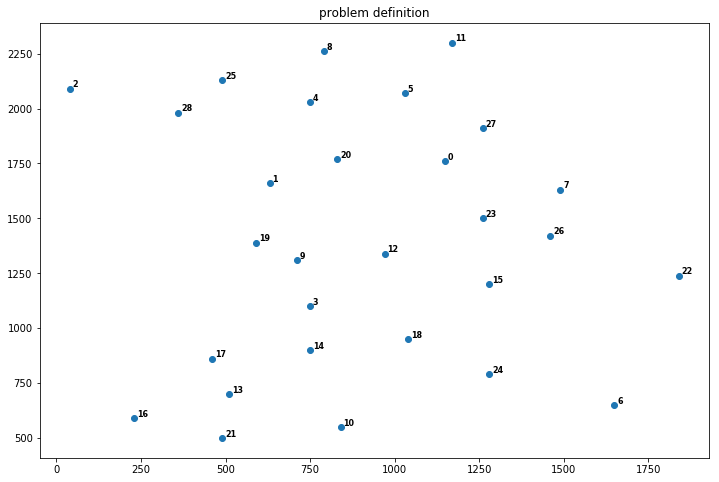

In [3]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('problem definition')

plt.show()

## Objective function

In [7]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

## SGA-PMX

In [33]:
sga_pmx = SGA(tsp_objective_function, chromosome_length=n, 
              mutation=reverse_sequence_mutation,
              replacement=mu_plus_lambda_replacement,
              genetic_operator=pmx)

In [21]:
sga_pmx.evolve(population_size=50,
               number_of_iterations=250,
               crossover_probability=0.95,
               mutation_probability=0.35)

  0     0.00904894 21622.66409589 24566.31621567 26236.36342285 1222.24566923
  1     0.01333642 21108.84458632 23165.08759509 24364.91546669 871.04740591
  2     0.01762843 20052.54848550 22204.08255650 23289.84261666 736.15737425
  3     0.02136087 19731.63914344 21499.30181534 22532.36719745 715.81698995
  4     0.02535176 19098.50899546 20970.35729072 21775.03800938 691.33181793
  5     0.02933526 19098.50899546 20427.79765930 21282.53901174 519.04487596
  6     0.03313446 17083.10701423 19980.82405805 20634.58719748 600.74611256
  7     0.03703237 17083.10701423 19607.82199199 20149.41663043 513.22268246
  8     0.04054832 17083.10701423 19289.52094860 19731.63914344 656.64019968
  9     0.04427886 15832.20431818 18520.06098100 19541.46574386 950.06640317
 10     0.04784918 15832.20431818 17496.07893941 18519.54925081 693.32151247
 11     0.05118108 15832.20431818 16858.25140474 17083.10701423 418.42561742
 12     0.05477571 14972.43440926 16137.72024575 17083.10701423 425.5019002

129     0.41473460 9638.15166017 9638.15166017 9638.15166017   0.00000000
130     0.41795564 9638.15166017 9638.15166017 9638.15166017   0.00000000
131     0.42115211 9638.15166017 9638.15166017 9638.15166017   0.00000000
132     0.42461991 9638.15166017 9638.15166017 9638.15166017   0.00000000
133     0.42760444 9638.15166017 9638.15166017 9638.15166017   0.00000000
134     0.43101716 9638.15166017 9638.15166017 9638.15166017   0.00000000
135     0.43406248 9638.15166017 9638.15166017 9638.15166017   0.00000000
136     0.43686748 9638.15166017 9638.15166017 9638.15166017   0.00000000
137     0.43985152 9638.15166017 9638.15166017 9638.15166017   0.00000000
138     0.44275737 9638.15166017 9638.15166017 9638.15166017   0.00000000
139     0.44583297 9638.15166017 9638.15166017 9638.15166017   0.00000000
140     0.44872665 9638.15166017 9638.15166017 9638.15166017   0.00000000
141     0.45163870 9638.15166017 9638.15166017 9638.15166017   0.00000000
142     0.45472407 9638.15166017 9638.

array([ 21622.66409589,  21108.84458632,  20052.5484855 ,  19731.63914344,
        19098.50899546,  19098.50899546,  17083.10701423,  17083.10701423,
        17083.10701423,  15832.20431818,  15832.20431818,  15832.20431818,
        14972.43440926,  14972.43440926,  14603.02008665,  14603.02008665,
        14603.02008665,  13210.21760445,  12946.45653504,  12222.8160015 ,
        12222.8160015 ,  12120.56856429,  12120.56856429,  12057.22806673,
        11954.98062952,  11954.98062952,  11935.53079967,  11935.53079967,
        11894.84370824,  11596.65165015,  11555.96455871,  11555.96455871,
        11442.46483377,  11222.69006686,  11222.69006686,  11222.69006686,
        11222.69006686,  11091.51499972,  11080.5385318 ,  11080.5385318 ,
        10951.19834025,  10863.31490697,  10863.31490697,  10863.31490697,
        10752.53388922,  10752.53388922,  10752.53388922,  10752.53388922,
        10752.53388922,  10752.53388922,  10699.91605635,  10684.04254568,
        10684.04254568,  

In [14]:
sga_pmx.evolve(population_size=50,
               number_of_iterations=250,
               crossover_probability=0.95,
               mutation_probability=0.35)

  0     0.05418038 19748.34528349 24676.55197661 26205.12074436 1106.33778583
  1     0.09364438 19748.34528349 23529.28930735 24822.27225743 1043.11822384
  2     0.13255692 17460.32789351 22552.24302628 23748.28494973 1010.30656737
  3     0.17129397 17460.32789351 21564.04347581 22747.03933880 1004.93446844
  4     0.20918846 17325.63553863 20674.16930366 21916.97971423 970.45050570
  5     0.24585700 17325.63553863 20004.60022840 21082.96573471 845.35999684
  6     0.28356862 17325.63553863 19396.45398587 20455.95597648 765.17810550
  7     0.32415891 16837.52639758 18889.26934002 19805.02992424 650.24475668
  8     0.36138749 16837.52639758 18508.66933459 19266.60435085 537.24524109
  9     0.39911795 15716.81370294 18179.09344262 18876.04310419 530.33800072
 10     0.43429351 15145.72095595 17802.34498137 18475.47105174 568.26522308
 11     0.47208476 15145.72095595 17455.49343977 18169.60690200 574.16924281
 12     0.50995588 14974.43429804 17073.16546197 17754.10951120 579.7446

110     3.31577182 9105.87600599 9105.87600599 9105.87600599   0.00000000
111     3.34323192 9105.87600599 9105.87600599 9105.87600599   0.00000000
112     3.37228656 9105.87600599 9105.87600599 9105.87600599   0.00000000
113     3.39951921 9105.87600599 9105.87600599 9105.87600599   0.00000000
114     3.42643309 9105.87600599 9105.87600599 9105.87600599   0.00000000
115     3.45328903 9105.87600599 9105.87600599 9105.87600599   0.00000000
116     3.48074913 9105.87600599 9105.87600599 9105.87600599   0.00000000
117     3.50727272 9105.87600599 9105.87600599 9105.87600599   0.00000000
118     3.53554034 9105.87600599 9105.87600599 9105.87600599   0.00000000
119     3.56291628 9105.87600599 9105.87600599 9105.87600599   0.00000000
120     3.59025407 9105.87600599 9105.87600599 9105.87600599   0.00000000
121     3.61735058 9105.87600599 9105.87600599 9105.87600599   0.00000000
122     3.64428282 9105.87600599 9105.87600599 9105.87600599   0.00000000
123     3.67180204 9105.87600599 9105.

222     6.37484145 9105.87600599 9105.87600599 9105.87600599   0.00000000
223     6.40210724 9105.87600599 9105.87600599 9105.87600599   0.00000000
224     6.42901373 9105.87600599 9105.87600599 9105.87600599   0.00000000
225     6.45690298 9105.87600599 9105.87600599 9105.87600599   0.00000000
226     6.48366952 9105.87600599 9105.87600599 9105.87600599   0.00000000
227     6.51100826 9105.87600599 9105.87600599 9105.87600599   0.00000000
228     6.53853106 9105.87600599 9105.87600599 9105.87600599   0.00000000
229     6.56485128 9105.87600599 9105.87600599 9105.87600599   0.00000000
230     6.59424829 9105.87600599 9105.87600599 9105.87600599   0.00000000
231     6.62172437 9105.87600599 9105.87600599 9105.87600599   0.00000000
232     6.64967871 9105.87600599 9105.87600599 9105.87600599   0.00000000
233     6.67623305 9105.87600599 9105.87600599 9105.87600599   0.00000000
234     6.70409155 9105.87600599 9105.87600599 9105.87600599   0.00000000
235     6.73015428 9105.87600599 9105.

array([ 19748.34528349,  19748.34528349,  17460.32789351,  17460.32789351,
        17325.63553863,  17325.63553863,  17325.63553863,  16837.52639758,
        16837.52639758,  15716.81370294,  15145.72095595,  15145.72095595,
        14974.43429804,  14558.83772066,  14522.48268689,  14118.37258406,
        13497.93753196,  13497.93753196,  13326.95794404,  13089.36694049,
        12244.65690017,  12244.65690017,  12244.65690017,  12244.65690017,
        11893.25954237,  11829.23052008,  11634.14780533,  11291.40748579,
        11291.40748579,  11151.95868859,  11133.48547446,  10893.34296842,
        10561.72625518,  10561.72625518,  10561.72625518,  10240.31350447,
        10240.31350447,  10066.61880255,   9944.86378316,   9749.16107254,
         9749.16107254,   9720.50595001,   9720.50595001,   9608.13207329,
         9356.33539205,   9356.33539205,   9105.87600599,   9105.87600599,
         9105.87600599,   9105.87600599,   9105.87600599,   9105.87600599,
         9105.87600599,  

In [15]:
sga_pmx.evolve(population_size=50,
               number_of_iterations=250,
               crossover_probability=0.95,
               mutation_probability=0.35)

  0     0.05881405 20180.15190934 24795.91653863 26251.15202678 1125.02015244
  1     0.09609008 20180.15190934 23579.89305822 24845.06127990 991.93123522
  2     0.13540387 19103.48084733 22568.27682539 23728.76752621 910.45117756
  3     0.17335701 19103.48084733 21778.97848043 22798.39133591 778.22329680
  4     0.21081614 16891.41547071 21169.76324775 22140.67249686 775.35708852
  5     0.24862576 16204.76860389 20664.08646859 21577.79971175 798.87472386
  6     0.28612995 16204.76860389 20083.80056473 20971.65614829 783.18623909
  7     0.32414484 16204.76860389 19582.42287544 20481.85964497 747.79491109
  8     0.36043954 15849.99400696 19136.56080330 19981.55649680 777.86002308
  9     0.40048051 15783.01007187 18577.57579315 19519.70553488 807.89865626
 10     0.43761539 15486.62112062 17985.19835522 18951.27325963 777.48320338
 11     0.47297502 14946.67295082 17367.50670961 18333.88804040 699.81826140
 12     0.50870490 14946.67295082 16867.53325651 17684.75401820 548.1246677

111     3.32815242 9364.75877726 9364.75877726 9364.75877726   0.00000000
112     3.35464191 9364.75877726 9364.75877726 9364.75877726   0.00000000
113     3.38291192 9364.75877726 9364.75877726 9364.75877726   0.00000000
114     3.41022801 9364.75877726 9364.75877726 9364.75877726   0.00000000
115     3.43614984 9364.75877726 9364.75877726 9364.75877726   0.00000000
116     3.46333504 9364.75877726 9364.75877726 9364.75877726   0.00000000
117     3.49006200 9364.75877726 9364.75877726 9364.75877726   0.00000000
118     3.51745653 9364.75877726 9364.75877726 9364.75877726   0.00000000
119     3.54505658 9364.75877726 9364.75877726 9364.75877726   0.00000000
120     3.57180810 9364.75877726 9364.75877726 9364.75877726   0.00000000
121     3.59897161 9364.75877726 9364.75877726 9364.75877726   0.00000000
122     3.62673163 9364.75877726 9364.75877726 9364.75877726   0.00000000
123     3.65316606 9364.75877726 9364.75877726 9364.75877726   0.00000000
124     3.68040919 9364.75877726 9364.

223     6.37107897 9364.75877726 9364.75877726 9364.75877726   0.00000000
224     6.39876986 9364.75877726 9364.75877726 9364.75877726   0.00000000
225     6.42648840 9364.75877726 9364.75877726 9364.75877726   0.00000000
226     6.45424628 9364.75877726 9364.75877726 9364.75877726   0.00000000
227     6.48104095 9364.75877726 9364.75877726 9364.75877726   0.00000000
228     6.50788903 9364.75877726 9364.75877726 9364.75877726   0.00000000
229     6.53490162 9364.75877726 9364.75877726 9364.75877726   0.00000000
230     6.56174493 9364.75877726 9364.75877726 9364.75877726   0.00000000
231     6.58987212 9364.75877726 9364.75877726 9364.75877726   0.00000000
232     6.61641526 9364.75877726 9364.75877726 9364.75877726   0.00000000
233     6.64584374 9364.75877726 9364.75877726 9364.75877726   0.00000000
234     6.67389154 9364.75877726 9364.75877726 9364.75877726   0.00000000
235     6.70069385 9364.75877726 9364.75877726 9364.75877726   0.00000000
236     6.72742939 9364.75877726 9364.

array([ 20180.15190934,  20180.15190934,  19103.48084733,  19103.48084733,
        16891.41547071,  16204.76860389,  16204.76860389,  16204.76860389,
        15849.99400696,  15783.01007187,  15486.62112062,  14946.67295082,
        14946.67295082,  14946.67295082,  14825.00449987,  13906.05865165,
        13798.84773215,  13726.6134733 ,  13145.32907006,  13145.32907006,
        13090.3149281 ,  13081.47462831,  12545.4541051 ,  12366.00892675,
        12223.84164077,  11726.21056702,  11726.21056702,  11726.21056702,
        11666.00141429,  11666.00141429,  11482.27505108,  11304.95400595,
        11183.50174083,  10737.62058039,  10737.62058039,  10629.38375939,
        10533.24040477,  10402.21030727,  10312.08999032,  10159.45868337,
        10046.54508992,  10046.54508992,   9988.4449758 ,   9868.94062854,
         9843.03118981,   9788.56321529,   9661.31073703,   9661.31073703,
         9661.31073703,   9603.21062291,   9603.21062291,   9603.21062291,
         9568.69196867,  

In [34]:
best, best_chromosome = sga_pmx.evolve(population_size=50,
                                       number_of_iterations=250,
                                       crossover_probability=0.95,
                                       mutation_probability=0.35)

  0     0.01102901 21181.95539272 25027.98933403 26564.72847199 1313.82737145
  1     0.01561069 19995.06445377 23127.59183774 24933.24308531 1407.98687772
  2     0.01983643 19810.21087323 21570.40124881 22925.03067932 748.16734839
  3     0.02370691 18554.24215740 20956.70782152 21516.77772538 625.41361001
  4     0.02789474 18488.02518243 20229.45303921 21181.95539272 673.76424013
  5     0.03190947 18255.29780059 19509.33161759 20197.24323528 531.09784517
  6     0.03600240 18255.29780059 19095.18505817 19736.95055195 415.81753174
  7     0.04014134 17800.11967216 18800.19180145 19237.58578120 329.31498854
  8     0.04407024 17035.41200265 18465.69222016 19002.02694440 463.99450508
  9     0.04793119 16741.65106258 18033.15526026 18554.24215740 491.69038254
 10     0.05223703 16727.32863455 17706.42289718 18291.93262417 456.86631889
 11     0.05628014 16431.46928351 17431.43267201 18065.88863726 412.57018232
 12     0.06043172 16253.83897650 17093.15683262 17682.65780556 361.377926

118     0.41763544 9389.73223847 9389.73223847 9389.73223847   0.00000000
119     0.42099595 9389.73223847 9389.73223847 9389.73223847   0.00000000
120     0.42440224 9389.73223847 9389.73223847 9389.73223847   0.00000000
121     0.42803764 9389.73223847 9389.73223847 9389.73223847   0.00000000
122     0.43122458 9389.73223847 9389.73223847 9389.73223847   0.00000000
123     0.43428063 9389.73223847 9389.73223847 9389.73223847   0.00000000
124     0.43730545 9389.73223847 9389.73223847 9389.73223847   0.00000000
125     0.44065547 9389.73223847 9389.73223847 9389.73223847   0.00000000
126     0.44392705 9389.73223847 9389.73223847 9389.73223847   0.00000000
127     0.44696450 9389.73223847 9389.73223847 9389.73223847   0.00000000
128     0.45009446 9389.73223847 9389.73223847 9389.73223847   0.00000000
129     0.45352960 9389.73223847 9389.73223847 9389.73223847   0.00000000
130     0.45715857 9389.73223847 9389.73223847 9389.73223847   0.00000000
131     0.46031857 9389.73223847 9389.

241     0.82042837 9389.73223847 9389.73223847 9389.73223847   0.00000000
242     0.82431746 9389.73223847 9389.73223847 9389.73223847   0.00000000
243     0.82753062 9389.73223847 9389.73223847 9389.73223847   0.00000000
244     0.83119369 9389.73223847 9389.73223847 9389.73223847   0.00000000
245     0.83478022 9389.73223847 9389.73223847 9389.73223847   0.00000000
246     0.83818889 9389.73223847 9389.73223847 9389.73223847   0.00000000
247     0.84159756 9389.73223847 9389.73223847 9389.73223847   0.00000000
248     0.84496140 9389.73223847 9389.73223847 9389.73223847   0.00000000
249     0.84809995 9389.73223847 9389.73223847 9389.73223847   0.00000000


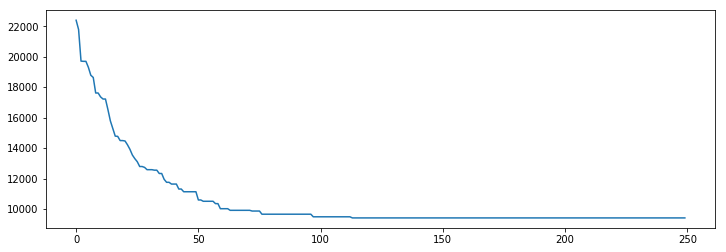

In [31]:
plt.figure(figsize=(12,4))
plt.plot(best)
plt.show()

In [186]:
best

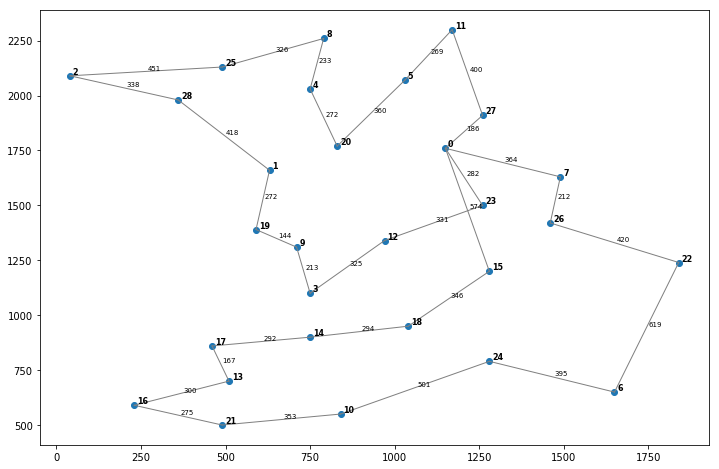

In [36]:
from matplotlib.lines import Line2D

route = best_chromosome
coords = coords.astype("int")

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})


plt.show()

In [25]:
coords[0, 0]

1150.0

In [29]:
route

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]])

In [35]:
best_chromosome

array([23, 12,  3,  9, 19,  1, 28,  2, 25,  8,  4, 20,  5, 11, 27,  0,  7,
       26, 22,  6, 24, 10, 21, 16, 13, 17, 14, 18, 15])

In [40]:
opt = np.array([1,
28,
6,
12,
9,
26,
3,
29,
5,
21,
2,
20,
10,
4,
15,
18,
14,
17,
22,
11,
19,
25,
7,
23,
8,
27,
16,
13,
24]) - 1

In [38]:
len(opt)

29

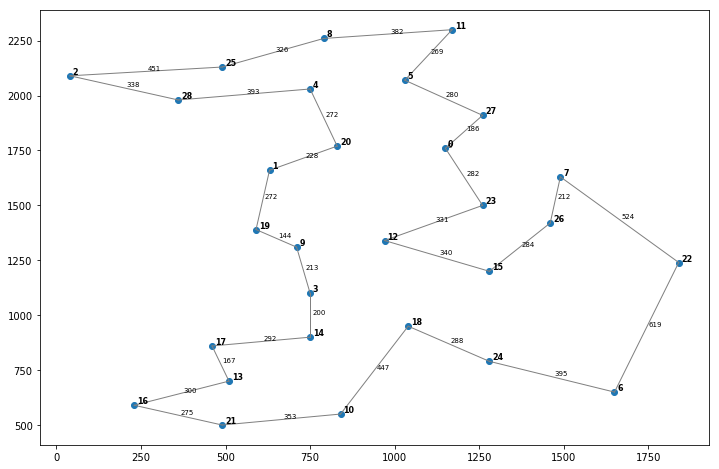

In [41]:
from matplotlib.lines import Line2D

route = opt
coords = coords.astype("int")

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})


plt.show()

In [42]:
tsp_objective_function(opt)

9074.1480478728427